<a href="https://colab.research.google.com/github/Phalit045040/045040_DEV_Project_1/blob/main/045040_Dev_1_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this project is to automate the extraction and analysis of commodity price data from the website "centralcharts.com." The goal is to obtain a comprehensive list of commodities, including their current prices, changes in prices, opening prices, and trading volumes. And do Basic Descriptive & Mathematical or Statistical Analysis.



In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from tabulate import tabulate

# Create a list that contains the URL for each page.
pages = []

# There are 155 pages in the entire set.
for page_number in range(1, 155):  # Fixed page range
    url = f'https://www.centralcharts.com/en/price-list-ranking/ALL/asc/ts_522-commodities--qc_1-alphabetical-order?p={page_number}'
    pages.append(url)

headers = []  # Initialize headers outside the loop
stock_df = pd.DataFrame()  # Initialize an empty DataFrame

# Cycle through each page.
for page in pages:
    webpage = requests.get(page)
    soup = bs(webpage.text, 'html.parser')

    # Check to see if the page contains a table. If it does,
    # create a list of  tags. If not, go to the next page.
    if soup.find('table'):
        stock_table = soup.find('table', class_='tabMini tabQuotes')
        tr_tag_list = stock_table.find_all('tr')

        # If headers are not initialized, extract them
        if not headers:
            th_tag_list = stock_table.find_all('th')
            headers = [th.text.strip() for th in th_tag_list]
            headers[0] = 'Name'
            headers = [h for h in headers if h not in ('Cap.', 'Issued Cap.', '')]
            stock_df = pd.DataFrame(columns=headers)

        # Cycle through the  list. For each
        # row, find the  tags within the row. Then
        # obtain the text within each  tag. Lastly,
        # place the text in a new row of the dataframe.
        for each_tr_tag in tr_tag_list[1:]:
            td_tag_list = each_tr_tag.find_all('td')
            row_values = [td.text.strip() for td in td_tag_list[0:7]]
            stock_df.loc[len(stock_df)] = row_values

# Clean and convert data types
stock_df = stock_df.replace({',': '', '-': '1', '%': ''}, regex=True)
stock_df[['Current price', 'Change(%)', 'Open', 'High', 'Low', 'Volume']] = stock_df[
    ['Current price', 'Change(%)', 'Open', 'High', 'Low', 'Volume']].apply(pd.to_numeric)

# Sort the DataFrame by 'Volume' in descending order
stock_df = stock_df.sort_values(by=['Volume'], ascending=False)

# Convert the DataFrame to a nicely formatted table
table = tabulate(stock_df, headers='keys', tablefmt='pretty')

# Print the table
print(table)



+------+--------------------------------------------+---------------+-----------+---------+---------+---------+--------+
|      |                    Name                    | Current price | Change(%) |  Open   |  High   |   Low   | Volume |
+------+--------------------------------------------+---------------+-----------+---------+---------+---------+--------+
| 900  |        OUNCE GOLD USD (GOLD 1 USD)         |    1918.86    |   10.08   | 1920.31 | 1929.76 | 1917.32 | 279265 |
| 2436 |        OUNCE GOLD USD (GOLD 1 USD)         |    1918.86    |   10.08   | 1920.31 | 1929.76 | 1917.32 | 279265 |
| 1524 |        OUNCE GOLD USD (GOLD 1 USD)         |    1918.86    |   10.08   | 1920.31 | 1929.76 | 1917.32 | 279265 |
| 3300 |        OUNCE GOLD USD (GOLD 1 USD)         |    1918.86    |   10.08   | 1920.31 | 1929.76 | 1917.32 | 279265 |
| 876  |        OUNCE GOLD USD (GOLD 1 USD)         |    1918.86    |   10.08   | 1920.31 | 1929.76 | 1917.32 | 279265 |
| 2940 |        OUNCE GOLD USD (

1.	Summary Statistics and Insights for Commodity Prices (Mean, median, mode and standard deviation).

In [ ]:
import pandas as pd
from tabulate import tabulate

# Assuming you have already scraped and cleaned the data into the 'stock_df' DataFrame
# If not, please load the DataFrame as in your previous code.

# Calculate summary statistics
summary_stats = stock_df.describe()

# Calculate the number of unique commodities
unique_commodities = len(stock_df['Name'].unique())

# Calculate the number of commodities with positive and negative price changes
positive_changes = len(stock_df[stock_df['Change(%)'] > 0])
negative_changes = len(stock_df[stock_df['Change(%)'] < 0])

# Create a DataFrame to display the statistics
analysis_data = {
    'Statistic': ['Number of Commodities', 'Mean Price', 'Median Price',
                  'Positive Price Changes', 'Negative Price Changes'],
    'Value': [unique_commodities, summary_stats.loc['mean', 'Current price'],
              summary_stats.loc['50%', 'Current price'], positive_changes, negative_changes]
}

analysis_df = pd.DataFrame(analysis_data)

# Print the summary statistics in a tabular format
print(tabulate(analysis_df, headers='keys', tablefmt='pretty', showindex=False))

# Interpretation
print("\nInterpretation:")
print("Number of unique commodities:", unique_commodities)
print("Mean Price:", summary_stats.loc['mean', 'Current price'])
print("Median Price:", summary_stats.loc['50%', 'Current price'])
print("Number of commodities with positive price changes:", positive_changes)
print("Number of commodities with negative price changes:", negative_changes)


+------------------------+-------------------+
|       Statistic        |       Value       |
+------------------------+-------------------+
| Number of Commodities  |       24.0        |
|       Mean Price       | 416.5730541666667 |
|      Median Price      | 89.08000000000001 |
| Positive Price Changes |      3696.0       |
| Negative Price Changes |        0.0        |
+------------------------+-------------------+

Interpretation:
Number of unique commodities: 24
Mean Price: 416.5730541666667
Median Price: 89.08000000000001
Number of commodities with positive price changes: 3696
Number of commodities with negative price changes: 0


 2.Visualization of Commodity Price Changes (Histogram).

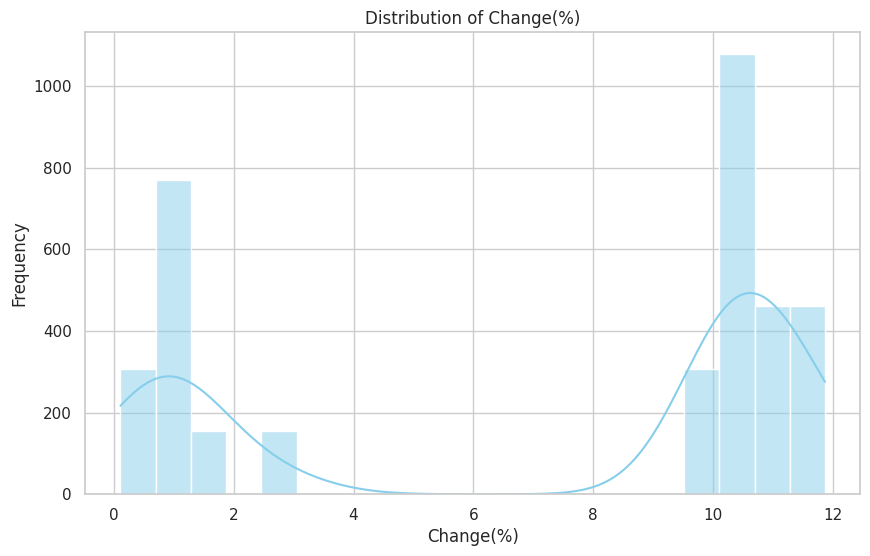

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded and cleaned your data as 'stock_df'

# Set the style for Seaborn plots (optional)
sns.set(style="whitegrid")

# Create a histogram of 'Change(%)'
plt.figure(figsize=(10, 6))
sns.histplot(stock_df['Change(%)'], bins=20, kde=True, color='skyblue')
plt.xlabel('Change(%)')
plt.ylabel('Frequency')
plt.title('Distribution of Change(%)')
plt.show()



3.Scatter Plot - Volume vs. Current Price for Commodities.

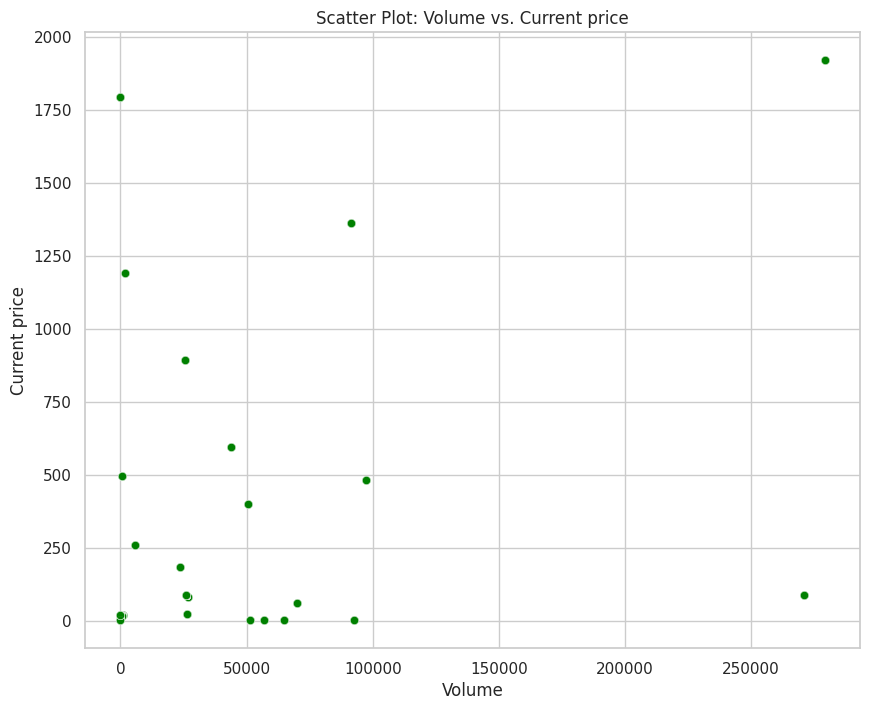

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of 'Volume' vs. 'Current price'
plt.figure(figsize=(10, 8))
sns.scatterplot(data=stock_df, x='Volume', y='Current price', alpha=0.5, color='green')

# Add labels and a title
plt.xlabel('Volume')
plt.ylabel('Current price')
plt.title('Scatter Plot: Volume vs. Current price')

# Show the plot
plt.show()


4.Box Plot - Distribution of Percentage Changes.

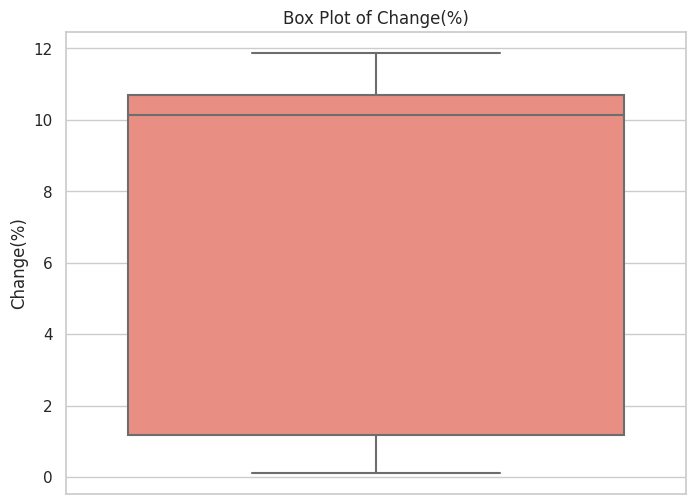

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with a specified size (width, height)
plt.figure(figsize=(8, 6))

# Create a box plot for the 'Change(%)' column
sns.boxplot(y=stock_df['Change(%)'], color='salmon')

# Set the y-axis label
plt.ylabel('Change(%)')

# Set the title for the box plot
plt.title('Box Plot of Change(%)')

# Show the box plot
plt.show()

5.Top 10 Commodities with the Highest Trading Volume


In [ ]:
from tabulate import tabulate

# Sort the DataFrame by 'Volume' in descending order
sorted_df = stock_df.sort_values(by='Volume', ascending=False)

# Group the DataFrame by 'Name' and find the commodity with the highest 'Volume' in each group
highest_volume_commodities = sorted_df.groupby('Name')['Volume'].max().reset_index()

# Rename the 'Volume' column to 'Highest Volume'
highest_volume_commodities = highest_volume_commodities.rename(columns={'Volume': 'Highest Volume'})

# Sort the DataFrame by 'Highest Volume' in descending order
highest_volume_commodities = highest_volume_commodities.sort_values(by='Highest Volume', ascending=False)

# Take the top 10 commodities with the highest volume
top_10_highest_volume = highest_volume_commodities.head(10)

# Convert the DataFrame to a nicely formatted table
table = tabulate(top_10_highest_volume, headers='keys', tablefmt='pretty', showindex=False)

# Print the table
print(table)

+------------------------------------------+----------------+
|                   Name                   | Highest Volume |
+------------------------------------------+----------------+
|       OUNCE GOLD USD (GOLD 1 USD)        |     279265     |
| LIGHT CRUDE OIL FULL1023 (WTI CRUDE OIL) |     270972     |
|           CORN FULL1223 (CORN)           |     97464      |
|    NATURAL GAS FULL1023 (NATURAL GAS)    |     92561      |
|        SOYBEAN FULL1123 (SOYBEAN)        |     91180      |
|    SOYBEAN OIL FULL1223 (SOYBEAN OIL)    |     70112      |
|         COPPER FULL1223 (COPPER)         |     64795      |
|      RBOB GASOLINE FULL1023 (GASOL)      |     56898      |
| ULSD HEATING OIL FULL1023 (HEATING OIL)  |     51169      |
|          SOYBEAN MEAL FULL1223           |     50597      |
+------------------------------------------+----------------+


6.Top 10 Commodities with the Lowest Trading Volume.

In [ ]:
from tabulate import tabulate

# Sort the DataFrame by 'Volume' in descending order
sorted_df = stock_df.sort_values(by='Volume', ascending=False)

# Group the DataFrame by 'Name' and find the commodity with the lowest 'Volume' in each group
lowest_volume_commodities = sorted_df.groupby('Name')['Volume'].min().reset_index()

# Rename the 'Volume' column to 'Lowest Volume'
lowest_volume_commodities = lowest_volume_commodities.rename(columns={'Volume': 'Lowest Volume'})

# Sort the DataFrame by 'Lowest Volume' in ascending order to find the lowest volumes
lowest_volume_commodities = lowest_volume_commodities.sort_values(by='Lowest Volume', ascending=True)

# Take the lowest 10 commodities with the lowest volume
bottom_10_lowest_volume = lowest_volume_commodities.head(10)

# Convert the DataFrame to a nicely formatted table
table_lowest = tabulate(bottom_10_lowest_volume, headers='keys', tablefmt='pretty', showindex=False)

# Print the table for the lowest volume commodities
print("Top 10 Commodities with the Lowest Trading Volume:")
print(table_lowest)



Top 10 Commodities with the Lowest Trading Volume:
+------------------------------------------+---------------+
|                   Name                   | Lowest Volume |
+------------------------------------------+---------------+
|       OUNCE GOLD EUR (GOLD 1 EUR)        |       1       |
|     OUNCE SILVER EUR (SILVER 1 EUR)      |       1       |
|          MINI GASOLINE FULL1023          |       1       |
|         LUMBER FULL1123 (LUMBER)         |      491      |
|     ROUGH RICE FULL1123 (ROUGH RICE)     |      582      |
| CLASS III MILK FULL1023 (CLASS III MILK) |      958      |
|      PALLADIUM FULL1223 (PALLADIUM)      |     1785      |
|  FEEDER CATTLE FULL1023 (FEEDER CATTLE)  |     5721      |
|    LIVE CATTLE FULL1023 (LIVE CATTLE)    |     23743     |
|       PLATINUM FULL1023 (PLATINUM)       |     25401     |
+------------------------------------------+---------------+


7.Correlation Matrix and Metric Interpretation

In [ ]:
import pandas as pd
from tabulate import tabulate

# Assuming you have already loaded and cleaned your data as 'stock_df'

# Calculate the correlation matrix
correlation_matrix = stock_df[['Current price', 'Change(%)', 'Open', 'High', 'Low', 'Volume']].corr()

# Interpretation
interpretation = [
    {"Metric": "Current price", "Interpretation": "Interpretation of Current price correlation."},
    {"Metric": "Change(%)", "Interpretation": "Interpretation of Change(%) correlation."},
    {"Metric": "Open", "Interpretation": "Interpretation of Open correlation."},
    {"Metric": "High", "Interpretation": "Interpretation of High correlation."},
    {"Metric": "Low", "Interpretation": "Interpretation of Low correlation."},
    {"Metric": "Volume", "Interpretation": "Interpretation of Volume correlation."}
]

# Convert the correlation matrix and interpretation to tabular format
correlation_table = tabulate(correlation_matrix, headers='keys', tablefmt='grid')
interpretation_table = tabulate(interpretation, headers='keys', tablefmt='grid')

# Print the correlation matrix and interpretation
print("Correlation Matrix:")
print(correlation_table)

print("\nInterpretation:")
print(interpretation_table)


Correlation Matrix:
+---------------+-----------------+-------------+----------+----------+----------+-----------+
|               |   Current price |   Change(%) |     Open |     High |      Low |    Volume |
+===============+=================+=============+==========+==========+==========+===========+
| Current price |        1        |    0.20156  | 0.999956 | 0.999919 | 0.999992 |  0.270484 |
+---------------+-----------------+-------------+----------+----------+----------+-----------+
| Change(%)     |        0.20156  |    1        | 0.205393 | 0.205644 | 0.203163 | -0.207134 |
+---------------+-----------------+-------------+----------+----------+----------+-----------+
| Open          |        0.999956 |    0.205393 | 1        | 0.999989 | 0.999961 |  0.267768 |
+---------------+-----------------+-------------+----------+----------+----------+-----------+
| High          |        0.999919 |    0.205644 | 0.999989 | 1        | 0.999922 |  0.267483 |
+---------------+-------------

8.Outlier Detection for 'Volume' Column.

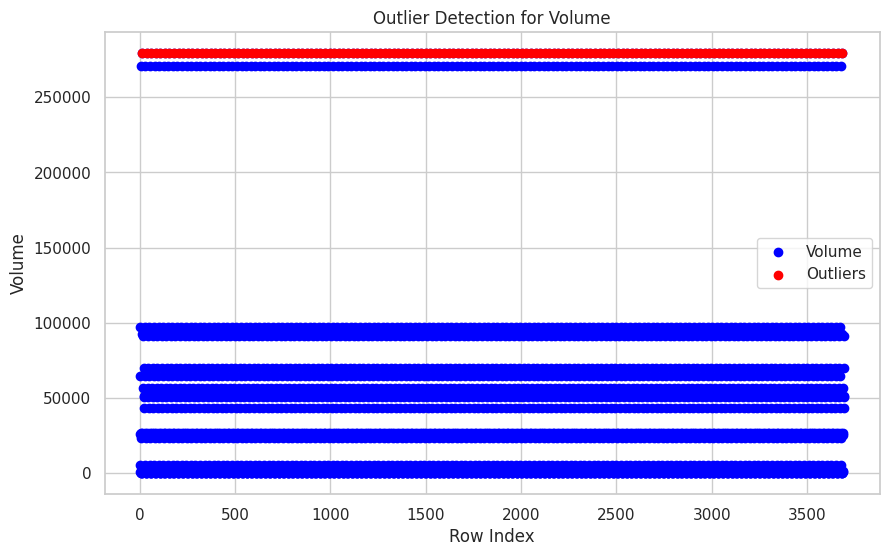

Number of Detected Outliers: 154

Detected Outliers:
|      | Name                        |   Current price |   Change(%) |    Open |    High |     Low |   Volume |
|-----:|:----------------------------|----------------:|------------:|--------:|--------:|--------:|---------:|
|  900 | OUNCE GOLD USD (GOLD 1 USD) |         1918.86 |       10.08 | 1920.31 | 1929.76 | 1917.32 |   279265 |
| 2436 | OUNCE GOLD USD (GOLD 1 USD) |         1918.86 |       10.08 | 1920.31 | 1929.76 | 1917.32 |   279265 |
| 1524 | OUNCE GOLD USD (GOLD 1 USD) |         1918.86 |       10.08 | 1920.31 | 1929.76 | 1917.32 |   279265 |
| 3300 | OUNCE GOLD USD (GOLD 1 USD) |         1918.86 |       10.08 | 1920.31 | 1929.76 | 1917.32 |   279265 |
|  876 | OUNCE GOLD USD (GOLD 1 USD) |         1918.86 |       10.08 | 1920.31 | 1929.76 | 1917.32 |   279265 |
| 2940 | OUNCE GOLD USD (GOLD 1 USD) |         1918.86 |       10.08 | 1920.31 | 1929.76 | 1917.32 |   279265 |
| 2484 | OUNCE GOLD USD (GOLD 1 USD) |         1918

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Calculate the Z-scores for the 'Volume' column
z_scores = np.abs(stats.zscore(stock_df['Volume']))

# Define a threshold for considering values as outliers
threshold = 3  # You can adjust this threshold as needed

# Identify outliers based on the threshold
outliers = np.where(z_scores > threshold)

# Get the rows with outlier Volume values
outlier_rows = stock_df.iloc[outliers]

# Number of outliers
num_outliers = len(outliers[0])

# Visualization of outliers
plt.figure(figsize=(10, 6))
plt.scatter(stock_df.index, stock_df['Volume'], color='blue', label='Volume')
plt.scatter(outlier_rows.index, outlier_rows['Volume'], color='red', label='Outliers')
plt.xlabel('Row Index')
plt.ylabel('Volume')
plt.title('Outlier Detection for Volume')
plt.legend()
plt.show()

# Interpretation in tabular format
outliers_table = outlier_rows.to_markdown()

# Print the number of outliers and the outliers table
print("Number of Detected Outliers:", num_outliers)
print("\nDetected Outliers:")
print(outliers_table)

# You can also choose to remove the outliers from the DataFrame if needed:
# stock_df = stock_df.drop(outliers)


9.Linear Regression for Predicting 'Current Price'

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ... Your web scraping code ...

# Assuming that 'stock_df' contains the scraped and cleaned data

# Select the features (independent variables) and the target (dependent variable)
# In this example, we'll use 'Open' and 'High' as features to predict 'Current price'
X = stock_df[['Open', 'High']]
y = stock_df['Current price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the regression results
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

# Optionally, you can print the coefficients and intercept of the linear regression model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 19.191095910184785
Root Mean Squared Error: 4.380764306623307
R-squared: 0.9999394019028267
Coefficients: [ 2.18553255 -1.18317636]
Intercept: 0.263724765903703
